<a href="https://colab.research.google.com/github/brainmentorspvtltd/IGDTU_ImageProcessingTF/blob/main/IG_FashionMNIST_Example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D
from tensorflow.keras.models import Sequential
import numpy as np
import matplotlib.pyplot as plt

In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [3]:
class_names = ["T-Shirt", "Trouser", "Pullover", "Dress","Coat","Sandal",
               "Shirt","Sneaker","Bag","Ankle Boot"]

In [4]:
x_train.shape

(60000, 28, 28)

In [5]:
x_test.shape

(10000, 28, 28)

In [6]:
y_train[0]

9

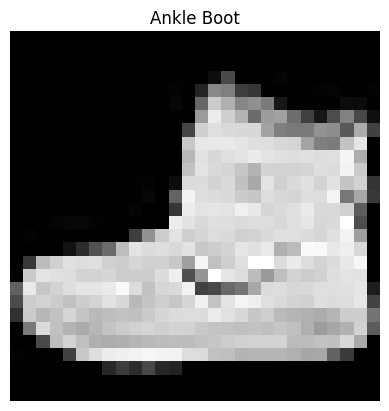

In [7]:
plt.imshow(x_train[0], cmap="gray")
plt.title(class_names[y_train[0]])
plt.axis(False)
plt.show()

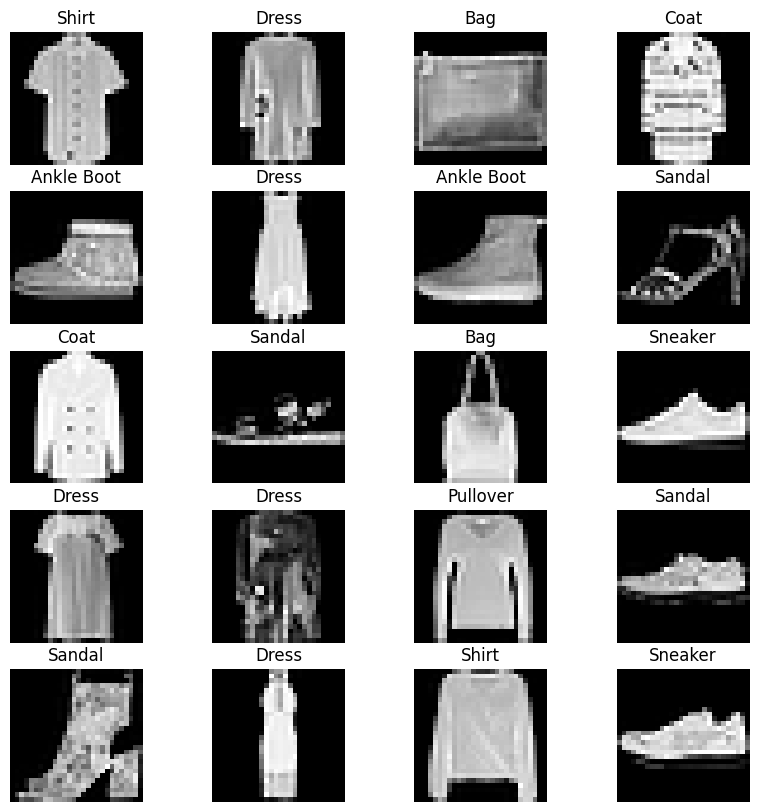

In [8]:
indices = np.random.randint(0,60000,20)

plt.figure(figsize=(10,10))
for i in range(len(indices)):
  plt.subplot(5,4,i+1)
  plt.imshow(x_train[indices[i]], cmap="gray")
  plt.title(class_names[y_train[indices[i]]])
  plt.axis(False)
plt.show()

In [9]:
# normalization of images
x_train = x_train / 255.
x_test = x_test / 255.

In [10]:
# model = tf.keras.Sequential([
#     Flatten(input_shape=(28,28)), # we flatten the images so that it becomes [28*28]
#     Dense(128, activation="relu"), # hidden layer that contains 128 neurons
#     Dense(10) # output layer that contains 10 neurons
# ])

model = tf.keras.Sequential()
# Add Convolutional Layer - it will apply convolutional operation
model.add(Conv2D(filters=32,kernel_size=(3,3), activation="relu", input_shape=(28,28,1)))
# Add Max Pooling Layer
model.add(MaxPool2D())
# Again adding Convolutional and Pooling Layers
model.add(Conv2D(filters=64,kernel_size=(3,3), activation="relu"))
model.add(MaxPool2D())
# Flatten the image
model.add(Flatten())
# FCN - Fully Connected Network
model.add(Dense(64, activation="tanh"))
# Output Layer
model.add(Dense(10, activation="softmax"))

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense (Dense)               (None, 64)                1

In [12]:
model.compile(optimizer="adam", 
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))

Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/backend.py:5612: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1875/1875 [==============================] - 21s 4ms/step - loss: 0.4356 - accuracy: 0.8403 - val_loss: 0.3418 - val_accuracy: 0.8759
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2974 - accuracy: 0.8898 - val_loss: 0.3064 - val_accuracy: 0.8891
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2541 - accuracy: 0.9047 - val_loss: 0.2904 - val_accuracy: 0.8910
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2235 - accuracy: 0.9172 - val_loss: 0.2643 - val_accuracy: 0.9036
Epoch 5/5
1875/1875 [==============================] - 7s 3ms/step - loss: 0.1977 - accuracy: 0.9276 - val_loss: 0.2659 - val_accuracy: 0.9008


In [ ]:
model.predict(x_test[100].reshape(1,28,28))

1/1 [==============================] - 0s 49ms/step


array([[ -2.840575 ,  -5.5602326,  -4.8264313,   5.0981026,  -7.1904135,
         -6.0444384,  -2.673203 , -15.362861 ,  -5.954588 , -10.156867 ]],
      dtype=float32)

In [ ]:
np.argmax(model.predict(x_test[100].reshape(1,28,28)))

1/1 [==============================] - 0s 91ms/step


3

In [ ]:
class_names[3]

'Dress'

In [ ]:
y_test[100]

3

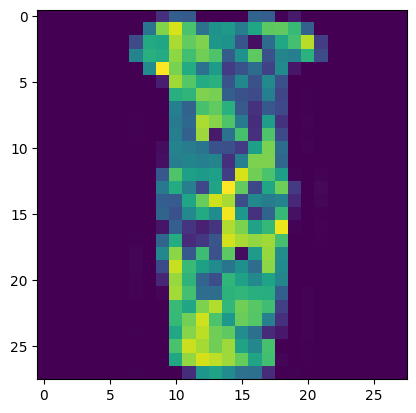

In [ ]:
plt.imshow(x_test[100])